## Importing the libraries

In [1]:
import importlib
import header
importlib.reload(header)
from header import *

## Splitting the dataset into the Training set and Test set

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('./datasets/ISCX_Botnet.csv')
# selection of all columns except label class with label = 0
X = dataset.iloc[:, :-1].values
# selection of only label class with label = 1
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

## Support vector machine (SVM) - tarining of model

In [3]:
# classifier_svm = SVC(kernel = 'linear', random_state = 0)
# classifier_svm.fit(X_train, y_train)

## K-Nearest Neighbors (K-NN) model tarining

In [4]:
# classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
# classifier_knn.fit(X_train, y_train)

## Decision Tree Classification - tarining of model

In [5]:
classifier_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## LogisticRegression - tarining of model

In [6]:
# classifier_lr = LogisticRegression()
# classifier_lr.fit(X_train, y_train)

## Naive Bayse - tarining of model


In [7]:
# classifier_nb = GaussianNB()
# classifier_nb.fit(X_train, y_train)

## Making the Confusion matrices of all models


## Model Evaluation - SVM 

In [8]:
# y_pred = classifier_svm.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print('Accuracy: ', acc)
# print('Precision: ',precision)
# print('Recall', recall)

# df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(7,5))
# sns.set(font_scale=1.4) # label size
# cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

## Model Evaluation - K-NN 

In [9]:
# y_pred = classifier_knn.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print('Accuracy: ', acc)
# print('Precision: ',precision)
# print('Recall', recall)

# df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(7,5))
# sns.set(font_scale=1.4) # label size
# cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

## Model Evaluation - Logistic Regression


In [10]:
# y_pred = classifier_lr.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print('Accuracy: ', acc)
# print('Precision: ',precision)
# print('Recall', recall)

# df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(7,5))
# sns.set(font_scale=1.4) # label size
# cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

# acc = int(float(str(acc))*100)
# precision = int(float(str(precision))*100)
# recall = int(float(str(recall))*100)


## Model Evaluation - Naive Bayes


In [11]:
# y_pred = classifier_nb.predict(X_test)
# cm = confusion_matrix(y_test, y_pred)
# acc = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)

# print('Accuracy: ', acc)
# print('Precision: ',precision)
# print('Recall', recall)

# df_cm = pd.DataFrame(cm, range(2), range(2))
# plt.figure(figsize=(7,5))
# sns.set(font_scale=1.4) # label size
# cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

## Model Evaluation - Decision tree


Accuracy:  0.99913959991396
Precision:  0.9982852689010132
Recall 0.9982852689010132


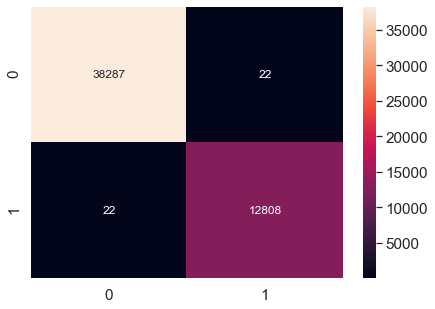

In [12]:
y_pred = classifier_dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision: ',precision)
print('Recall', recall)

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4) # label size
cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

# Test GAN-based Samples on Trained Classifier

# Preprocessing on original and GAN generated data 

In [13]:
np.random.seed(0)
rows = 5000 # number of rows to be removed

# Selection of all benign indexes from ISCX dataset
zero_labels = dataset.query('Label == 0')

# Random selection of 5000 benign samples
indexes = np.random.choice(zero_labels.index, rows, replace=False) 
rand_data = dataset.iloc[indexes]
print(len(rand_data))
print("Random selection of 5000 benign samples", rand_data.shape)

5000
Random selection of 5000 benign samples (5000, 61)


In [14]:
df_gan_bots = pd.read_csv('./datasets/gan_bots.csv')
df_gan_bots = df_gan_bots.loc[:, ~df_gan_bots.columns.str.contains('^Unnamed')]

# 5000 gan bots with benign samples from orginal dataset
df_gan_bots = pd.concat([df_gan_bots, rand_data])

print(df_gan_bots['Label'].value_counts())

# Selecting all rows except last one from gan bots
X_new_test = df_gan_bots.iloc[:, :-1].values

# Selecting all rows of last column (Label)
y_new_test = df_gan_bots.iloc[:, -1].values

1    5000
0    5000
Name: Label, dtype: int64


# Penetrating Decision Tree using GAN generated data

Accuracy:  0.502
Precision:  0.9545454545454546
Recall 0.0042


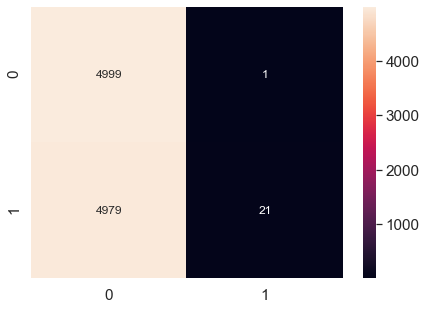

In [15]:
y_pred = classifier_dt.predict(X_new_test)
cm = confusion_matrix(y_new_test, y_pred)
acc = accuracy_score(y_new_test, y_pred)
precision = precision_score(y_new_test, y_pred)
recall = recall_score(y_new_test, y_pred)

print('Accuracy: ', acc)
print('Precision: ',precision)
print('Recall', recall)

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4) # label size
cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

# Getting evaded indexes especially getting index of False Negative FN

In [16]:
# Measuring TP, FP, TN, FN
def perf_measure(y_new, y_pred_dt):
    TP = 0
    FP = 0
    TN = 0
    FN = 0
    l = [] # store evaded indexes in 
    for i in range(len(y_pred_dt)): 
        if y_new[i]==y_pred_dt[i]==1:
           TP += 1
        if y_pred_dt[i]==1 and y_new[i]!=y_pred_dt[i]:
           FP += 1
        if y_new[i]==y_pred_dt[i]==0:
           TN += 1
        if y_pred_dt[i]==0 and y_new[i]!=y_pred_dt[i]:
           FN += 1
           l.append(i)
    return(TP, FP, TN, FN, l)

# Calculate Evasion Rate and saving evaded data

In [17]:
# getting evaded indexes
matrixes = perf_measure(np.array(y_new_test), y_pred)
index_FN = np.array(matrixes[4])

# getting samples of all evaded sixty columns
X_new_test = pd.DataFrame(X_new_test)
X_evade_ind = X_new_test.iloc[index_FN]

# getting samples of Label column
y_new_test = pd.DataFrame(y_new_test)
y_evade_ind = y_new_test.iloc[index_FN]

##saving combined dataframe as evaded bots
evaded_bots = pd.concat([X_evade_ind, y_evade_ind], axis=1, sort=False)
# adding column names to samples
evaded_bots.columns = ['Flow Duration', 'Total Fwd Packet', 'Total Bwd packets',
                               'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
                               'Fwd Packet Length Max', 'Fwd Packet Length Min',
                               'Fwd Packet Length Mean', 'Fwd Packet Length Std',
                               'Bwd Packet Length Max', 'Bwd Packet Length Min',
                               'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
                               'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Max', 'Flow IAT Min',
                               'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Min',
                               'Bwd IAT Total', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
                               'Bwd IAT Min', 'Fwd PSH Flags', 'Fwd Header Length',
                               'Bwd Header Length', 'Fwd Packets/s', 'Bwd Packets/s',
                               'Packet Length Min', 'Packet Length Max', 'Packet Length Mean',
                               'Packet Length Std', 'Packet Length Variance', 'FIN Flag Count',
                               'SYN Flag Count', 'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count',
                               'Down/Up Ratio', 'Average Packet Size', 'Fwd Segment Size Avg',
                               'Bwd Segment Size Avg', 'Bwd Bytes/Bulk Avg', 'Bwd Packet/Bulk Avg',
                               'Bwd Bulk Rate Avg', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
                               'Subflow Bwd Bytes', 'FWD Init Win Bytes', 'Bwd Init Win Bytes',
                               'Fwd Act Data Pkts', 'Fwd Seg Size Min', 'Idle Mean', 'Idle Std',
                               'Idle Max', 'Idle Min', 'Label']

evaded_bots.to_csv('./datasets/evaded_bots.csv',index=False)



In [18]:
# Evaded samples calculations
evaded_samples = len(index_FN)
total_bots = len(rand_data)

er = (evaded_samples/total_bots) * 100
# Evasion Rate = Malicious evaded Samples / Total Malicous Samples in Testset
print('Evasion Rate: ', er)

Evasion Rate:  99.58


# Retraining of classifier using evaded samples 

# Some preprocessings

In [63]:
# Concate evaded bots with original dataset
df = pd.concat([dataset, evaded_bots])
df.to_csv('./datasets/ISCX_Botnet(withEvadedSamples).csv', index = False)
print(df.shape)

(175440, 61)


In [64]:
# loading ISCX_Botnet(withEvadedSamples)
# selection of all columns except label class with label = 0
X = df.iloc[:, :-1].values
# selection of only label class with label = 1
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(122808, 60)
(52632, 60)
(122808,)
(52632,)


# Re-training of decision tree

In [65]:
classifier_dt_retrained = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier_dt_retrained.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#  Evaluation of classifier

Accuracy:  0.9991640066879465
Precision:  0.9983839235525576
Recall 0.9985242445537597


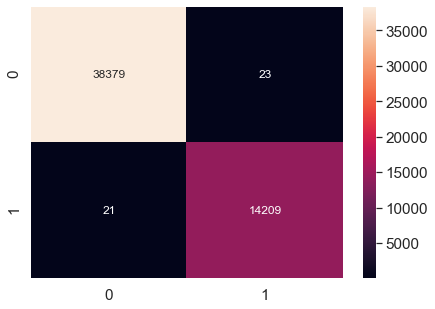

In [66]:
y_pred = classifier_dt_retrained.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy: ', acc)
print('Precision: ',precision)
print('Recall', recall)

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4) # label size
cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

# Penetrating retrained Decision Tree using GAN generated data

In [67]:
new_gan_bots = pd.read_csv('./datasets/new_gan_bots.csv')

# 5000 gan bots with benign samples from orginal dataset
new_gan_bots = pd.concat([new_gan_bots, rand_data])

print(new_gan_bots['Label'].value_counts())

# Selecting all rows except last one from gan bots
X_new_test = new_gan_bots.iloc[:, :-1].values

# Selecting all rows of last column (Label)
y_new_test = new_gan_bots.iloc[:, -1].values

1    5000
0    5000
Name: Label, dtype: int64


Accuracy:  0.9716
Precision:  0.9997880457821111
Recall 0.9434


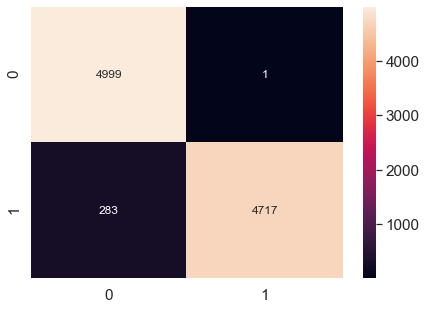

In [68]:
y_pred = classifier_dt_retrained.predict(X_new_test)
cm = confusion_matrix(y_new_test, y_pred)
acc = accuracy_score(y_new_test, y_pred)
precision = precision_score(y_new_test, y_pred)
recall = recall_score(y_new_test, y_pred)

print('Accuracy: ', acc)
print('Precision: ',precision)
print('Recall', recall)

df_cm = pd.DataFrame(cm, range(2), range(2))
plt.figure(figsize=(7,5))
sns.set(font_scale=1.4) # label size
cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 12})

# Calculate Evasion Rate

In [69]:
# getting evaded indexes
matrixes = perf_measure(np.array(y_new_test), y_pred)
index_FN = np.array(matrixes[4])

er = len(index_FN)
num_gan_bots = len(rand_data)
er = (er/num_gan_bots) * 100
# Evasion Rate = Malicious evaded Samples / Total Malicous Samples in Testset
print('\033[1m' , 'Evasion Rate: ' , er)

 Evasion Rate:  5.66
